# DAY 2: Models - Exercise 5.
RECAP: <br>
1. In Ex-1 We used OBS data to decide wether rainfall was higher or lower than average and assigned it a catagory.
2. in Ex-2 we used hindcasts to compare old forecasts to an oberved rainfall of the same period.
3. in Ex-3 we looked at how ensembles produce a small range that can when averaged can be better than a single members forecast.
4. in Ex-4 we looked at how ensembles can be bias corrected<br>
In this excersice we will be: <br>
Working out the probabilty that rainfall will fall into a specific catagory based on the forecast.<br>

The data for this excersise is below - this is the same data as Ex-2, Ex-3 and Ex-4<br>
A forecasted amount of rainfall is given for each year and the months OND. 

In [1]:
import numpy as np
import xarray as xr
from Data import location
da = location('Kenya')

Rainfall for 1994, Member 2: 4.38


## Terciles
First we will calculate the terciles for the data.<br>
We did this is ex 2. <br>
It is repeated here for brevity. 

In [2]:
RFA_upper = np.percentile(da, 66.66666)
RFA_lower = np.percentile(da, 33.33333)
#RF_upper = np.percentile( , 66.66666)
#RF_lower = np.percentile( , 33.33333)

print("The upper tercile determinor is:", RFA_upper)
print("This lower tercile determinor is:", RFA_lower)

The upper tercile determinor is: 2.986666187999999
This lower tercile determinor is: 2.22


We will now assign a number to each forecast member per year.<br>
This number represents if it falls below the lower tercile, between or above the upper terciles.<br>
<br>
We did this in Ex-1.<br>
This is a more complex version but the principle is the same.<br>
The reason it is more complicated is because we need to select for each year as well as each member. <br>


In [3]:
#First we create an empty array to store the data in
Yearly_Forecast_member_below = []
Yearly_Forecast_member_above= []
Yearly_Forecast_member_between = []


#now we select for each member
for i in range(da.sizes['year']):
         data = da.isel(year=i)
         cat_0_mask = data < RFA_lower
         Yearly_Forecast_member_below.append(cat_0_mask)
         cat_1_mask = data > RFA_upper
         Yearly_Forecast_member_above.append(cat_1_mask)
         cat_2_mask = (data >= 2.22) & (data <= 2.98)
         Yearly_Forecast_member_between.append(cat_2_mask)
  
 #Now we will join this back into one single list
Yearly_Forecast_below= xr.concat(Yearly_Forecast_member_below, dim='year')
Yearly_Forecast_above= xr.concat(Yearly_Forecast_member_above, dim='year')
Yearly_Forecast_between= xr.concat(Yearly_Forecast_member_between, dim='year')

Yearly_Counts_Below = Yearly_Forecast_below.sum(dim="member")
Yearly_Counts_Above = Yearly_Forecast_above.sum(dim="member")
Yearly_Counts_Between = Yearly_Forecast_between.sum(dim="member")

print("We have assigned a True value each time the forecast is in a certain catagory")
print("For catagory: Below Average")
print("")
print("For year 1 (1993) there is:", Yearly_Counts_Below.isel(year=0).item(), "counts of members forecasting in the below average catagory")


We have assigned a True value each time the forecast is in a certain catagory
For catagory: Below Average

For year 1 (1993) there is: 6 counts of members forecasting in the below average catagory


<br>
Now we have the count of all the true values for each year and each catagory. <br>
<br>
This is saying that for a specific year, a certain amount of forecast members predicted the rainfall in OND Kenya to fall into below,average or above average amount of rainfall.
<br>
<br>
To standardise this data we must now turn it into a percentage.<br>
So for each year what percentage of members fell into each catagory.<br>
To do this we take the counts, divide by the number of members and multiply by 100. 

In [4]:
#Again we create an empty array. 
Yearly_percentage_Below = []

# We select for each individual year
for i in range(Yearly_Counts_Below.sizes['year']):
    #We do the percentage calulcation
    percentage = (Yearly_Counts_Below.isel(year=i).item() / da.member.size) *100
    #We store it in the empty list
    Yearly_percentage_Below.append(percentage)

#We print to see the outcome
print("These are the percentage of Forecast members that fall into the below average catagory for each year",Yearly_percentage_Below)
    

These are the percentage of Forecast members that fall into the below average catagory for each year [40.0, 0.0, 26.666666666666668, 86.66666666666667, 0.0, 60.0, 53.333333333333336, 60.0, 53.333333333333336, 6.666666666666667, 26.666666666666668, 13.333333333333334, 53.333333333333336, 0.0, 33.33333333333333, 53.333333333333336, 13.333333333333334, 46.666666666666664, 0.0, 20.0, 73.33333333333333, 13.333333333333334, 0.0, 53.333333333333336]


**This has been done for you with the below average catagory**<br>
**Use the cells below by filling in the brackets with the correct dataset**<br>
<br>
**HINT**: For each cell you need to swap out any appearance of the word **__"Below"__** to be "Between" or "Above"

In [5]:
# -edit
#Again we create an empty array. 
Yearly_percentage_Above = []

# We select for each individual year
for i in range(Yearly_Counts_Above.sizes['year']):
    #We do the percentage calulcation
    percentage = (Yearly_Counts_Above.isel(year=i).item() / da.member.size) *100
    #We store it in the empty list
    Yearly_percentage_Above.append(percentage)

#We print to see the outcome
print("These are the percentage of Forecast members that fall into the below average catagory for each year",Yearly_percentage_Above)

These are the percentage of Forecast members that fall into the below average catagory for each year [26.666666666666668, 100.0, 13.333333333333334, 6.666666666666667, 100.0, 0.0, 6.666666666666667, 13.333333333333334, 6.666666666666667, 53.333333333333336, 26.666666666666668, 33.33333333333333, 0.0, 86.66666666666667, 26.666666666666668, 13.333333333333334, 33.33333333333333, 6.666666666666667, 60.0, 60.0, 0.0, 26.666666666666668, 100.0, 0.0]


In [6]:
# -edit
#Again we create an empty array. 
Yearly_percentage_Between = []

# We select for each individual year
for i in range(Yearly_Counts_Between.sizes['year']):
    #We do the percentage calulcation
    percentage = (Yearly_Counts_Between.isel(year=i).item() / da.member.size) *100
    #We store it in the empty list
    Yearly_percentage_Between.append(percentage)

#We print to see the outcome
print("These are the percentage of Forecast members that fall into the below average catagory for each year",Yearly_percentage_Between)

These are the percentage of Forecast members that fall into the below average catagory for each year [33.33333333333333, 0.0, 60.0, 6.666666666666667, 0.0, 40.0, 40.0, 26.666666666666668, 40.0, 40.0, 46.666666666666664, 53.333333333333336, 46.666666666666664, 13.333333333333334, 40.0, 33.33333333333333, 53.333333333333336, 46.666666666666664, 40.0, 20.0, 26.666666666666668, 60.0, 0.0, 46.666666666666664]


## Forecast
So now we can imagine its a certain year<br>
the months OND are coming up<br>
and we have the idea that for each self-imposed catagory a certain amount of members predicted for it. <br>
<br>
So How does this translate to the observed rainfall?
<br>
First, we must call back in the observed rainfall dataset. 

In [7]:
#-edit
RFA_obs = ([1.52,2.93,1.95,1.51,5.56,1.33,2.04,2.34,1.99,2.95,1.90,2.40,1.15,4.31,1.83,1.98,2.65,1.55,3.86,2.72,2.25,2.31,3.13,1.70])

Now we must work out for each observed value what catagory it falls into. <br>
We did this in Ex-1, It is repeated below.

In [8]:
#This equation below converts the Array to be able to be used in numpy function ">"
RFA_upper_obs = np.percentile(RFA_obs, 66.66666)
RFA_lower_obs = np.percentile(RFA_obs, 33.33333)

RFANP = np.array(RFA_obs)

# Now we will see if values in the array are greater than RFA_upper (2.48)
# If they are they will be turned into a '3'
RFANP[RFANP>RFA_upper_obs]= 3

#We now repeat this for RFA lower and RFA_middle
RFANP[RFANP<RFA_lower_obs]= 1
RFANP[(RFANP<RFA_upper_obs)&(RFANP>RFA_lower_obs)]= 2

RFA_Catagories = RFANP 

print("This is the Catagories each RNA value falls into:",RFA_Catagories," a value of 1,2 or 3 is lower, between or above respectively")

This is the Catagories each RNA value falls into: [1. 3. 2. 1. 3. 1. 2. 2. 2. 3. 1. 2. 1. 3. 1. 2. 3. 1. 3. 3. 2. 2. 3. 1.]  a value of 1,2 or 3 is lower, between or above respectively


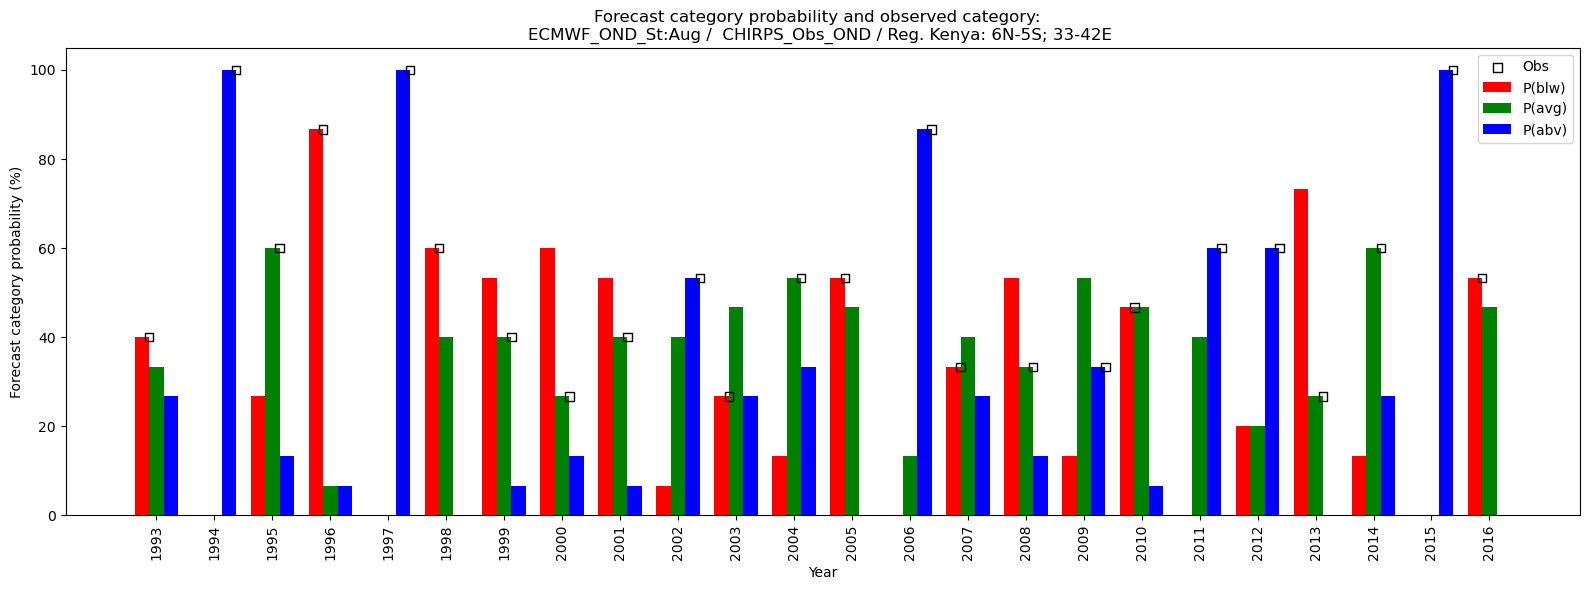

In [9]:
import matplotlib.pyplot as plt
import numpy as np

years = da.year.values

percentage_of_lower_forecast_predictions = Yearly_percentage_Below
percentage_of_middle_forecast_predictions = Yearly_percentage_Between
percentage_of_above_forecast_predictions = Yearly_percentage_Above

# Observed category values: 1=lower, 2=middle, 3=above
observed_category = RFA_Catagories

# Set bar width
bar_width = 0.25

# Set positions for each bar group
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the plot
plt.figure(figsize=(16, 6))

# Plot the bars
plt.bar(r1, percentage_of_lower_forecast_predictions, color='red', width=bar_width, label='P(blw)')
plt.bar(r2, percentage_of_middle_forecast_predictions, color='green', width=bar_width, label='P(avg)')
plt.bar(r3, percentage_of_above_forecast_predictions, color='blue', width=bar_width, label='P(abv)')

# Plot the observed category as outlined black squares on top of the corresponding bars
obs_x = []
obs_y = []

for i, cat in enumerate(observed_category):
    if cat == 1:
        obs_x.append(r1[i] + bar_width / 2)
        obs_y.append(percentage_of_lower_forecast_predictions[i])
    elif cat == 2:
        obs_x.append(r2[i] + bar_width / 2)
        obs_y.append(percentage_of_middle_forecast_predictions[i])
    elif cat == 3:
        obs_x.append(r3[i] + bar_width / 2)
        obs_y.append(percentage_of_above_forecast_predictions[i])

plt.scatter(obs_x, obs_y, facecolors='none', edgecolors='black', marker='s', label='Obs')

# Set x-axis labels
plt.xticks([r + bar_width for r in range(len(years))], years, rotation=90)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Forecast category probability (%)')
plt.title("Forecast category probability and observed category:  \nECMWF_OND_St:Aug /  CHIRPS_Obs_OND / Reg. Kenya: 6N-5S; 33-42E ")
plt.legend()

# Layout adjustment
plt.tight_layout()
plt.show()


# You have now finished EX 5; Please refer to the powerpoint on what to do next. 
## Copy the image of the plot into the powerpoint 